# **Noms: Jean-Pierre Mansour - Daphne Matoses - Ezekiel Rembangouet**

**Import des bibliothèques**

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Pour les réseaux de neurones feed-forward
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Pour le découpage des échantillons
from sklearn.model_selection import train_test_split


**Fonctions de base**


In [9]:
def genere_X(n,trou,corrupt):
  #  Si trou <= 0 : Genere un echantillon uniforme sur [0,1]
  #  Si (0< trou <0.5) : Genere un échantillon dont le support est dans [0,trou] U [1-trou, 1]
  #  Si (0< trou <0.5) et (corrupt != 0) : ajoute un example 0.5
    X = np.zeros(n)

    if (trou > 0) & (trou < 0.5):
        n2 = math.floor(n/2)
        X[0:n2] =  np.random.uniform(0, trou, n2)
        X[n2:] = np.random.uniform(1- trou , 1, n2)
        if (corrupt != 0):
            X[np.random.randint(0, n)] = 0.5
    else :
        X = np.random.uniform(0, 1, n)

    return X.reshape(-1, 1)
################################################################
def genere_Y(X,f,corrupt_value):
    # Genere Y suivant la fonction cosinus de frequence f
    # Si une entrée de X vaut 0.5, le Y correspondant vaut corrupt_value
    Y = np.cos(f*X)

    indices = np.where(X == 0.5)[0]
    if indices.size > 0:
        Y[indices] = corrupt_value

    return Y
################################################################
def genere_NN_dense(X,taille_output,largeur,profondeur):
    # X : sert à donner la taille de la couche d'entrée
    # taille_output : donne la taille de la couche de sortie
    # largeur : c'est la largeur des couches cachées
    # profondeur : Le nombre de couches cachées

    model = Sequential()   #crée un réseau de neurone vide
    for i in range(profondeur):      # crée les couches cachées
        model.add(Dense(largeur, activation='relu'))

    model.add(Dense(taille_output, activation='linear'))  #crée la couche de sortie

    y = model(X) # Pour donner la taille de la première couche

    return model
################################################################


# **Génère un echantillon**

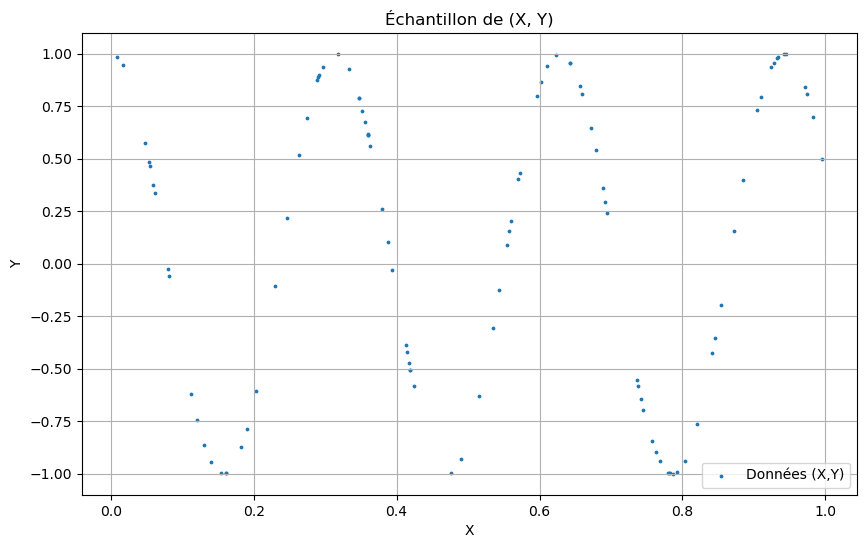

In [11]:
# caracteristiques de la distribution (X,Y)
f = 20       # Plus la frequence est élevée plus le problème est difficile
trou = 0.     # 0 ou dans (0,0.5)
corrupt = 1     # Pour visualiser que le réseau peut prendre n'importe quelle valeur en 0.5
corrupt_value = 10    # idem

# Définir la taille de l'échantillon
n = 100  # Nombre de points dans l'échantillon

# Génére X
X = genere_X(n,trou,corrupt )
Y = genere_Y(X,f,corrupt_value)

# Afficher (X,Y)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Données (X,Y)', alpha=1, s=3)
plt.title("Échantillon de (X, Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

**Génère un réseau de neurones ReLU "fully-connected" (i.e. feed forward ou dense)**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (100, 50)                   │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (100, 50)                   │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (100, 1)                    │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,901 (50.39 KB)

 Trainable params: 12,901 (50.39 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


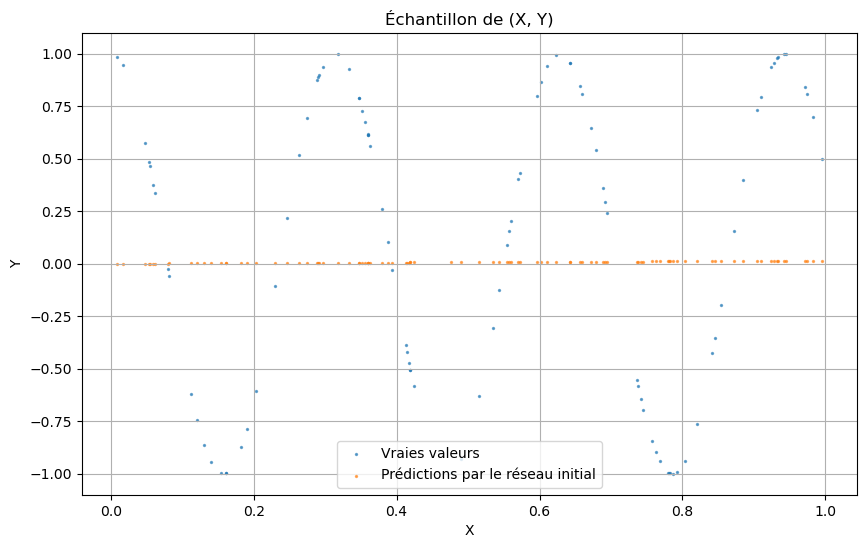

In [13]:
# architecture du réseau
largeur = 50
profondeur = 6
taille_output = 1

# Création du réseau de neurone (initialisation à 0)
model = genere_NN_dense(X,taille_output,largeur,profondeur)

# Affichage du modèle
model.summary()

# Prédiction faite par le réseau initial

Y_pred = model.predict(X)
# Afficher (X,Y)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Vraies valeurs', alpha=0.6, s=2)
plt.scatter(X, Y_pred, label='Prédictions par le réseau initial', alpha=0.6, s=2)
plt.title("Échantillon de (X, Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

**Optimisation du réseau de neurones (i.e. apprentissage)**

Erreur quadratique moyenne sur l'ensemble de test : 0.0113
Erreur absolue moyenne sur l'ensemble de test : 0.0557
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


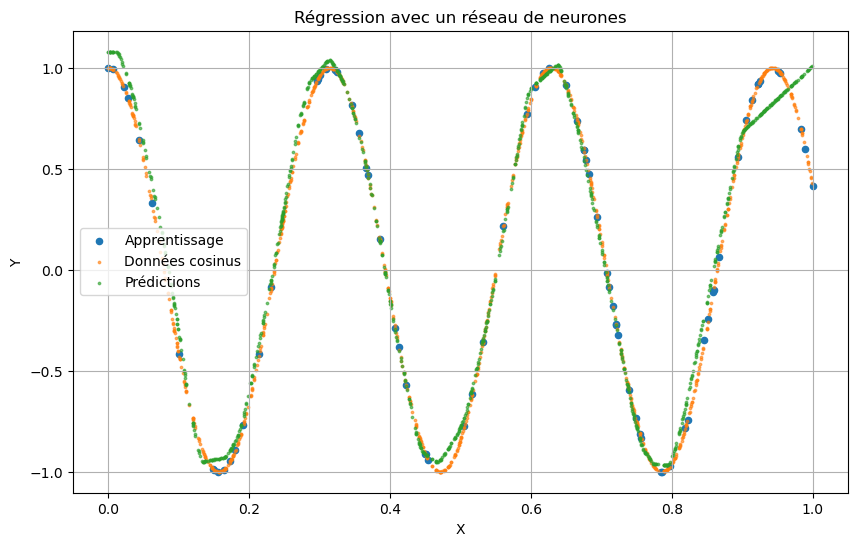

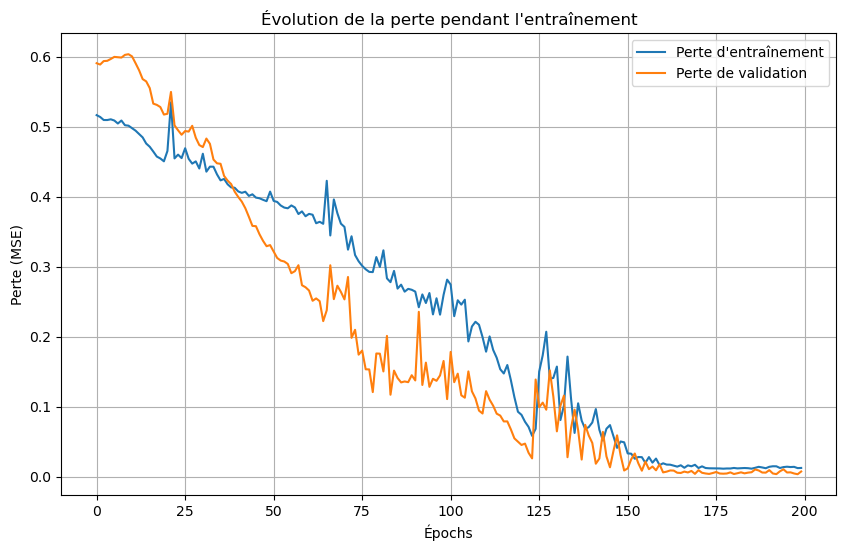

In [38]:
# découpage de l'échantillon
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Compilation du modèle (pour nous : définition de l'optimiseur et de la loss)
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Optimisation des paramètres du modèle
history = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0)  # Essayer avec verbose = 1

# Évaluation du modèle
loss, mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Erreur quadratique moyenne sur l'ensemble de test : {loss:.4f}")
print(f"Erreur absolue moyenne sur l'ensemble de test : {mae:.4f}")

# Affichage des fonctions
X_draw =  np.random.uniform(0, 1, 1000).reshape(-1, 1)
Y_draw_cos = np.cos(f*X_draw)
Y_draw_pred = model.predict(X_draw)

# Graphique : données réelles vs prédictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Apprentissage', alpha=1, s=20)
plt.scatter(X_draw, Y_draw_cos, label='Données cosinus', alpha=0.6, s=3)
plt.scatter(X_draw, Y_draw_pred, label='Prédictions', alpha=0.6, s=3)
plt.title("Régression avec un réseau de neurones")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

# Visualisation de la perte pendant l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.title("Évolution de la perte pendant l'entraînement")
plt.xlabel("Épochs")
plt.ylabel("Perte (MSE)")
plt.legend()
plt.grid()
plt.show()

1. Décrire ce que fait chacune des fonctions ci-dessus.
2. Ecrire un code pour tester différents learning\_rate et différents nombres d'epochs. Quel réglage recommandez-vous ?
3. Dans cette question, nous allons mettre en évidence le phénomène de régularisation implicite.

  a. Pour une profondeur de $6$, faites varier la largeur pour tracer sur un même graphique :
    - une courbe qui associe l'erreur d'apprentissage au nombre de paramètres
    - une courbe qui associe l'erreur de test au nombre de paramètres

  b. Que se passe-t-il lorsque le nombre de paramètres du réseau devient très grand ?
4. Dans cette question, nous voulons visualiser le phénomène de régularisation implicite. Pour cela, nous allons créer des inputs $X$ ne couvrant pas tout le support. Pour compléter l'étude, dans un second temps, nous rajouterons un point aberrant, isolé.

  a. Utiliser la fonction genere\_X pour créer un échantillon dont le support est inclus dans $[0,0.3]\cup [0.7,1]$.

  b. Faire 10 fois l'apprentissage d'un réseau de neurones de profondeur 6 et différentes largeurs sur des échantillons ayant les mêmes caractéristiques que dans la question précédente.
  
  Qu'observez-vous sur l'intervalle $[0.3,0.7]$ ?

  c. Utiliser la fonction genere\_X pour créer un échantillon dont le support est inclus dans $[0,0.3]\cup [0.7,1]$, avec un point aberrant en $(0,10)$.

  d. Faire 10 fois l'apprentissage d'un réseau de neurones de profondeur 6 et différentes largeurs sur des échantillons ayant les mêmes caractéristiques que dans la question précédente.
  
  Qu'observez-vous sur l'intervalle $[0.3,0.7]$ ?


<span style="text-decoration: underline; color: red;">**Réponse Question 1:**</span>  <br>
- Tout d'abord, l'algorithme d'optimisation utilisé pour ce modèle, est l'Algorithme d'Optimisation ADAM, et le choix de fonction de perte, est celui de la perte quadratique. Dans ces deux graphes, nous étudions l'évolution des pertes effectuées sur l'échantillon d'apprentissage et de validation, en fonction du nombre d'epochs, en considérant 80 exemples d'entraînement et des batchs de tailles 32.
- L'erreur effectuée sur l'échantillon d'apprentissage est importante, mais au fur et à mesure que le réseau de neurones s'entraîne et que ses paramètres sont ajustés, nous observons une diminution de l'erreur, qui tend vers 0 au bout de 200 epochs, car on va pouvoir fitter parfaitement les données, et parsuite ne commêtre plus d'erreur.
- L'erreur effectuée sur l'échantillon de validation est importante, qui devrait en théorie, diminuer jusqu'à une certaine valeur optimale, et puis rebondir. Mais pour ce modèle, qui traite un réseau de neurones, il semble se généraliser exceptionellement bien au données de validations. Ce qui est un effet observé exclusif aux réseaux de neurones, et on ne sait pas exactement pourquoi.

<span style="text-decoration: underline; color: red;">**Réponse Question 2:**</span>  <br>

In [45]:
learning_rates = [0.001, 0.005, 0.01]
epochs_list = [50, 100, 200]

# Stockage des résultats
results = []

# Boucle pour tester les combinaisons
for lr in learning_rates:
    for epochs in epochs_list:
        print(f"Test avec learning_rate={lr} et epochs={epochs}")
        model = genere_NN_dense(X_train, taille_output=1, largeur=50, profondeur=6)
        optimizer = Adam(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        history = model.fit(X_train, Y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
        
        # Evaluation
        val_loss = history.history['val_loss'][-1]
        results.append((lr, epochs, val_loss))

# Trouver le réglage optimal
best_lr, best_epochs, best_loss = min(results, key=lambda x: x[2])
print(f"Meilleur réglage: learning_rate={best_lr}, epochs={best_epochs} avec une perte de validation={best_loss:.4f}")

# Afficher les résultats
results.sort(key=lambda x: x[2])
print("\nRésumé des résultats :")
for lr, epochs, val_loss in results:
    print(f"learning_rate={lr}, epochs={epochs}, validation_loss={val_loss:.4f}")

Test avec learning_rate=0.001 et epochs=50
Test avec learning_rate=0.001 et epochs=100
Test avec learning_rate=0.001 et epochs=200
Test avec learning_rate=0.005 et epochs=50
Test avec learning_rate=0.005 et epochs=100
Test avec learning_rate=0.005 et epochs=200
Test avec learning_rate=0.01 et epochs=50
Test avec learning_rate=0.01 et epochs=100
Test avec learning_rate=0.01 et epochs=200
Meilleur réglage: learning_rate=0.005, epochs=200 avec une perte de validation=0.0016

Résumé des résultats :
learning_rate=0.005, epochs=200, validation_loss=0.0016
learning_rate=0.01, epochs=200, validation_loss=0.0295
learning_rate=0.005, epochs=100, validation_loss=0.1114
learning_rate=0.001, epochs=200, validation_loss=0.1122
learning_rate=0.001, epochs=100, validation_loss=0.3825
learning_rate=0.01, epochs=50, validation_loss=0.4305
learning_rate=0.01, epochs=100, validation_loss=0.4359
learning_rate=0.005, epochs=50, validation_loss=0.4850
learning_rate=0.001, epochs=50, validation_loss=0.5115


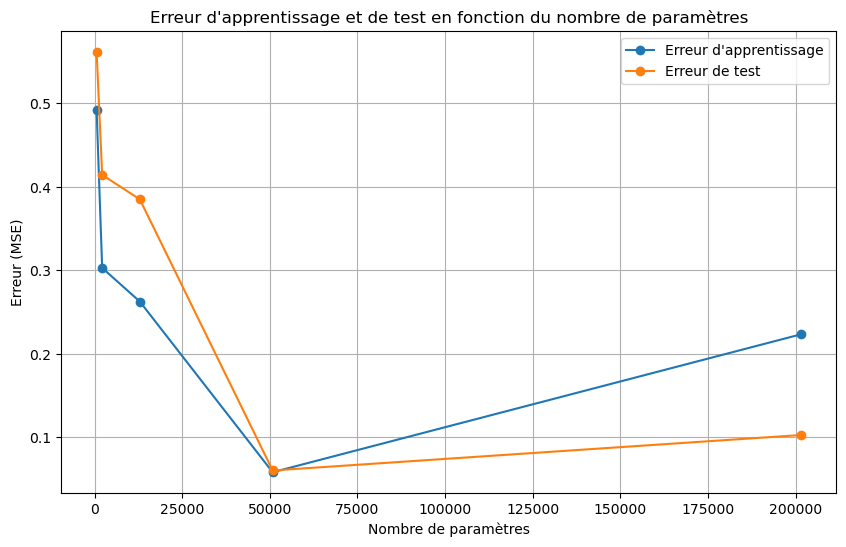

In [54]:
largeur = [10, 20, 50, 100, 200]  # Différentes largeurs des couches cachées
profondeur = 6  # Profondeur fixe
training_errors = []
test_errors = []
num_params = []

# Boucle pour tester différentes largeurs
for largeur in largeur:
    model = genere_NN_dense(X_train, taille_output=1, largeur=largeur, profondeur=profondeur)
    optimizer = Adam(learning_rate=0.005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    
    # Calcul des erreurs
    train_loss = history.history['loss'][-1]
    test_loss = model.evaluate(X_test, Y_test, verbose=0)[0]
    training_errors.append(train_loss)
    test_errors.append(test_loss)
    
    # Calcul du nombre de paramètres
    num_params.append(model.count_params())

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(num_params, training_errors, label='Erreur d\'apprentissage', marker='o')
plt.plot(num_params, test_errors, label='Erreur de test', marker='o')
plt.xlabel('Nombre de paramètres')
plt.ylabel('Erreur (MSE)')
plt.title('Erreur d\'apprentissage et de test en fonction du nombre de paramètres')
plt.legend()
plt.grid()
plt.show()

<span style="text-decoration: underline; color: red;">**Réponse Question 3b:**</span>  <br>
On observe lors de la rafination progressive de notre réseau de neurones, c'est à dire, l'augmentation de la largeur du réseaux, et ainsi le rajout de poids et de biais supplémentaires pour atteindre $50000$ paramètres, que notre modèle "fittera" quasi-parfaitement nos données d'entraînement, et se généralisera étonnamment bien à nos données de validation, en entraînant notre modèle sur une période de 100 epochs.  <br>
En revanche, avec un nombre de paramètres excessive, supérieur à $50000$ paramètres, le modèle commence à apprendre énormément bien, jusqu'au point qu'il arrivera à apprendre du bruit. Ceci influencera manifestement sa performance, et ainsi augmentera les erreurs.
 <br> 
A noter que nous laissons la profondeur du réseaux fixe, afin d'éviter potentiellement le phénomène de **vanishing gradient** ou **exploding gradient**. De plus, ce graphe met en évidence le fait qu'il est toujours judicieux d'augmenter la largeur du réseaux, pour obtenir un modèle plus robuste. 

<span style="text-decoration: underline; color: red;">**Réponse Question 4a:**</span>  <br>

In [24]:
n=100
trou= 0.3  # Déclare que le support est inclus dans [0,0.3] \cup [0.7,1]
corrupt=0  # Absence de valeur aberrante dan ce cas

# Génération de l'échantillon
X = genere_X(n, trou, corrupt)

<span style="text-decoration: underline; color: red;">**Réponse Question 4b:**</span>  <br>

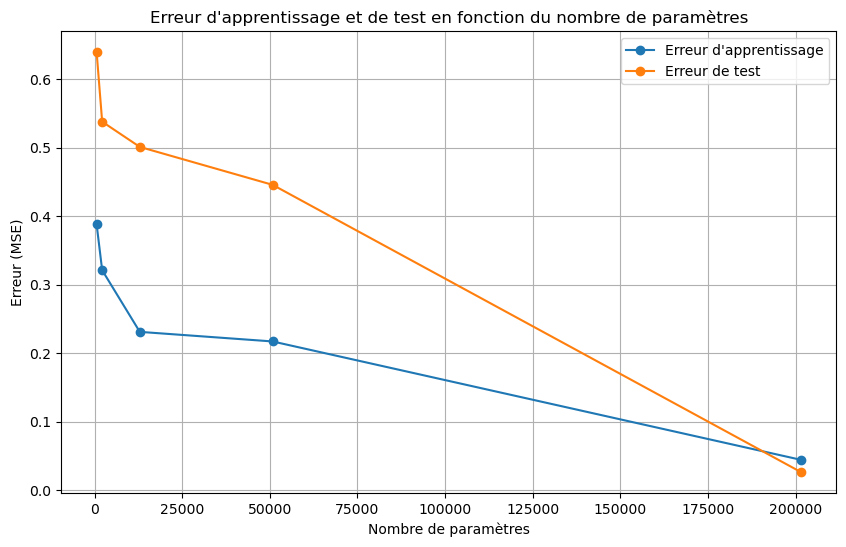

In [22]:
corrupt_value = 10
f=20
Y=genere_Y(X, f, corrupt_value)  # La condition X==0.5 ne sera jamais satisfaite, vu que le support de X est inclus dans [0,0.3] \cup [0.7,1]. # De ce fait, nous ne remplacerons jamais Y par 10 en X==0.5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
largeurs = [10, 20, 50, 100, 200]  # Différentes largeurs des couches cachées
profondeur = 6  # Profondeur fixe
training_errors = []
test_errors = []
num_params = []

# Boucle pour tester différentes largeurs
for largeur in largeurs:  # Utiliser `largeurs` comme liste
    model = genere_NN_dense(X_train, taille_output=1, largeur=largeur, profondeur=profondeur)
    optimizer = Adam(learning_rate=0.005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    
    # Calcul des erreurs
    train_loss = history.history['loss'][-1]
    test_loss = model.evaluate(X_test, Y_test, verbose=0)[0]
    training_errors.append(train_loss)
    test_errors.append(test_loss)
    
    # Calcul du nombre de paramètres
    num_params.append(model.count_params())

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(num_params, training_errors, label='Erreur d\'apprentissage', marker='o')
plt.plot(num_params, test_errors, label='Erreur de test', marker='o')
plt.xlabel('Nombre de paramètres')
plt.ylabel('Erreur (MSE)')
plt.title('Erreur d\'apprentissage et de test en fonction du nombre de paramètres')
plt.legend()
plt.grid()
plt.show()
                                                    

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


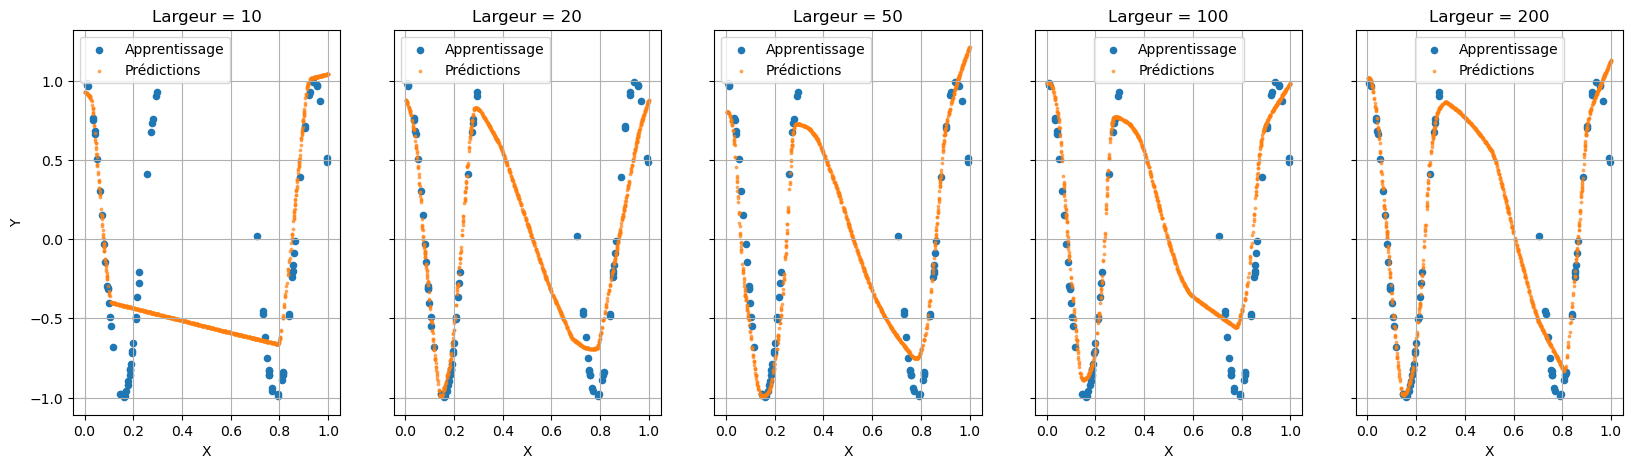

In [26]:
n=100
trou= 0.3  # Déclare que le support est inclus dans [0,0.3] \cup [0.7,1]
corrupt=0  # Absence de valeur aberrante dan ce cas
X = genere_X(n, trou, corrupt)
corrupt_value = 10
f=20
Y=genere_Y(X, f, corrupt_value)

largeurs = [10, 20, 50, 100, 200]
profondeur = 6
learning_rate = 0.005
epochs = 100
batch_size = 32

# Génération des données
X_draw = np.random.uniform(0, 1, 1000).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Préparer la figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(1, len(largeurs), figsize=(20, 5), sharey=True)

# Boucle pour entraîner le modèle avec différentes largeurs et afficher les résultats
for i, largeur in enumerate(largeurs):
    # Construire et entraîner le modèle
    model = genere_NN_dense(X_train, taille_output=1, largeur=largeur, profondeur=profondeur)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    # Prédictions
    Y_draw_pred = model.predict(X_draw)
    
    # Dessiner sur le sous-graphe correspondant
    ax = axes[i]
    ax.scatter(X_train, Y_train, label='Apprentissage', alpha=1, s=20)
    ax.scatter(X_draw, Y_draw_pred, label='Prédictions', alpha=0.6, s=3)
    ax.set_title(f"Largeur = {largeur}")
    ax.set_xlabel("X")
    if i == 0:
        ax.set_ylabel("Y")
    ax.grid()
    ax.legend()


<span style="text-decoration:; color: green;">**Commentaires:**</span>  


- Sur l'intervalle $[0.3,0.7]$, la région dans laquelle le modèle n'a pas été entrainé, nous remarquons tout de même, qu'au lieu de faire n'importe quoi sur cette région, et de dessiner une courbe irrégulière, le modèle **régularise implicitement**, sans même devoir imposer aucune condition explicite sur cette région. Le phénomène de régularisation implicite est remarqué nettement mieux pour une largeur égale à 200.

<span style="text-decoration: underline; color: red;">**Réponse Question 4c:**</span>  <br>

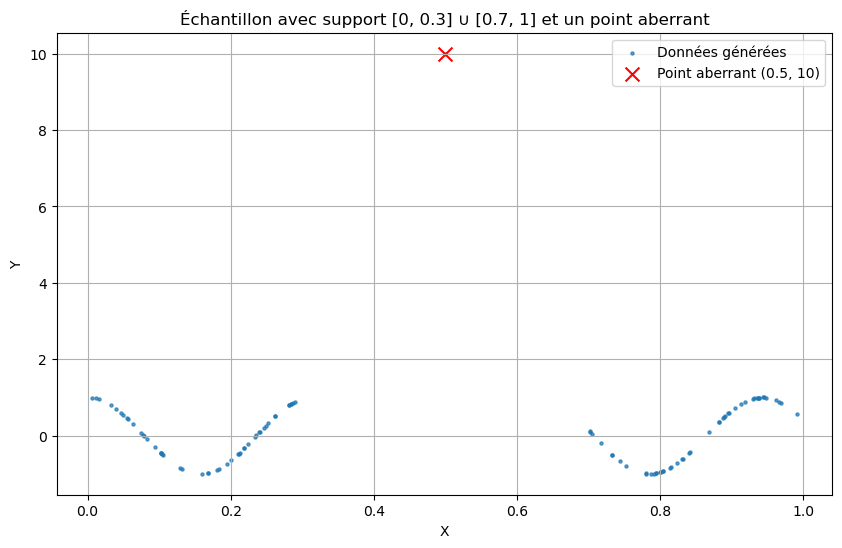

In [48]:
# Génération des données avec la fonction modifiée genere_X
n = 100  # Nombre de points normaux
trou = 0.3  # Pour générer le support [0, 0.3] ∪ [0.7, 1]
corrupt = 1  # Activer l'ajout du point aberrant

# Générer X avec un point aberrant
X = genere_X(n, trou, corrupt)

# Générer Y avec le point aberrant
f = 20
corrupt_value = 10  # Valeur de Y pour le point aberrant
Y = genere_Y(X, f, corrupt_value)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Données générées', alpha=0.7, s=5)
plt.scatter(0.5, 10, color='red', label='Point aberrant (0.5, 10)', s=100, marker='x')  # Point aberrant en évidence
plt.title("Échantillon avec support [0, 0.3] ∪ [0.7, 1] et un point aberrant")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

<span style="text-decoration: underline; color: red;">**Réponse Question 4d:**</span>  <br>

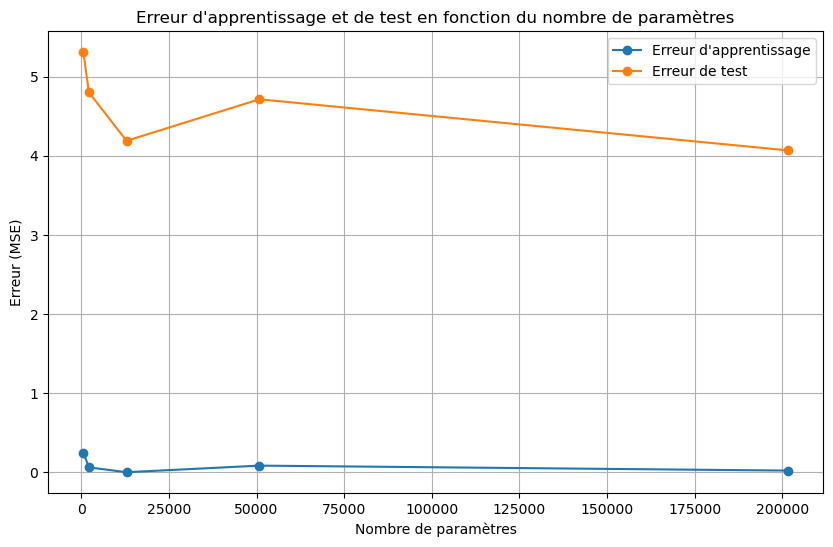

In [38]:
n = 100 
trou = 0.3 
corrupt = 1  
X = genere_X(n, trou, corrupt)
f = 20
corrupt_value = 10  
Y = genere_Y(X, f, corrupt_value)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
largeur = [10, 20, 50, 100, 200] 
profondeur = 6  
training_errors = []
test_errors = []
num_params = []

# Boucle pour tester différentes largeurs
for largeur in largeur:
    model = genere_NN_dense(X_train, taille_output=1, largeur=largeur, profondeur=profondeur)
    optimizer = Adam(learning_rate=0.005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    
    # Calcul des erreurs
    train_loss = history.history['loss'][-1]
    test_loss = model.evaluate(X_test, Y_test, verbose=0)[0]
    training_errors.append(train_loss)
    test_errors.append(test_loss)
    
    # Calcul du nombre de paramètres
    num_params.append(model.count_params())

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(num_params, training_errors, label='Erreur d\'apprentissage', marker='o')
plt.plot(num_params, test_errors, label='Erreur de test', marker='o')
plt.xlabel('Nombre de paramètres')
plt.ylabel('Erreur (MSE)')
plt.title('Erreur d\'apprentissage et de test en fonction du nombre de paramètres')
plt.legend()
plt.grid()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


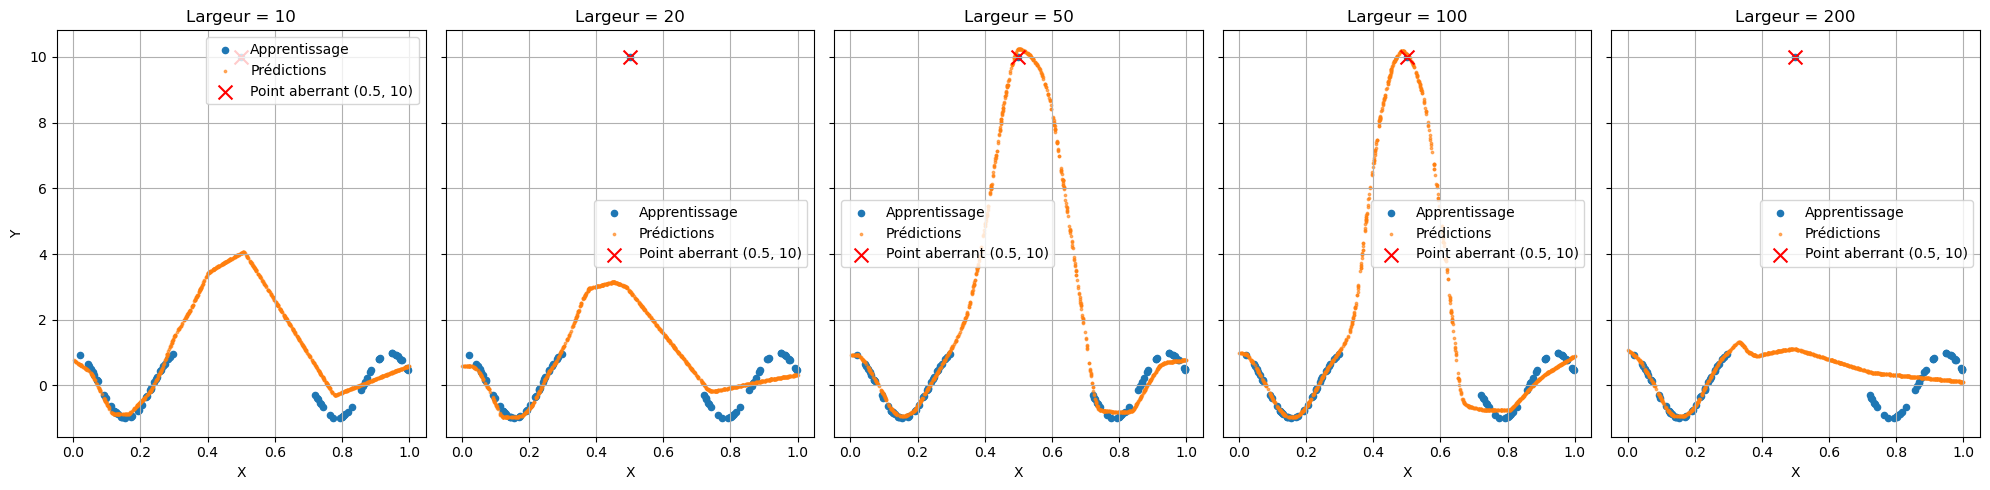

In [52]:
# Génération des données
n = 100
trou = 0.3  # Support inclus dans [0, 0.3] ∪ [0.7, 1]
corrupt = 1  # Activer l'ajout du point aberrant
X = genere_X(n, trou, corrupt)

f = 20
corrupt_value = 10  # Valeur aberrante associée à X = 0.5
Y = genere_Y(X, f, corrupt_value)

largeurs = [10, 20, 50, 100, 200]  # Différentes largeurs des couches cachées
profondeur = 6
learning_rate = 0.005
epochs = 100
batch_size = 32

# Génération des données pour les prédictions
X_draw = np.random.uniform(0, 1, 1000).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Préparer la figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(1, len(largeurs), figsize=(20, 5), sharey=True)

# Boucle pour entraîner le modèle avec différentes largeurs et afficher les résultats
for i, largeur in enumerate(largeurs):
    # Construire le modèle avec genere_NN_dense
    model = genere_NN_dense(X_train, taille_output=1, largeur=largeur, profondeur=profondeur)
    
    # Compiler et entraîner le modèle
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    
    # Prédictions
    Y_draw_pred = model.predict(X_draw)
    
    # Dessiner sur le sous-graphe correspondant
    ax = axes[i]
    ax.scatter(X_train, Y_train, label='Apprentissage', alpha=1, s=20)
    ax.scatter(X_draw, Y_draw_pred, label='Prédictions', alpha=0.6, s=3)
    
    # Mise en évidence du point aberrant (0.5, 10)
    ax.scatter(0.5, 10, color='red', label='Point aberrant (0.5, 10)', s=100, marker='x')
    
    ax.set_title(f"Largeur = {largeur}")
    ax.set_xlabel("X")
    if i == 0:
        ax.set_ylabel("Y")
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()


<span style="text-decoration:; color: green;">**Commentaires:**</span>  <br>
En prenant de petites largeurs, le modèle favorise une solution simple et ne s’ajuste pas au point aberrant. C'est là où la régularisation implicite est forte, au sens où le modèle évite les solutions complexes et non régulières. <br>
En augmentant la largeur du réseau, la régularisation implicite commence à s'affaiblir, et le modèle rajoute le point aberrant. <br>
Enfin, pour des largeurs trop élevées, on observe que dans cette zone des oscillations, ce qui peut être probablement expliqué par le fait que le modèle surajuste tellemement au point aberrant et aux dinnées d'apprentissage, au point qu'il établit un conflit entre eux.